**Importing all the required external python libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

**Reading the dataset using Pandas and performing exploratory data analysis.**

In [ ]:
df = pd.read_csv("CustomerChurn _CA1.csv")

In [ ]:
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1144,42
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1291,33
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1887,20
3,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,816,28
4,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,1088,24
5,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,1350,24
6,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,1441,32
7,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1570,29
8,Existing Customer,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,6,2,3,30367.0,2362,1671,27
9,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,2,2,3,3193.0,2517,1336,30


In [ ]:
df.Card_Category.value_counts()

Blue        5817
Silver       342
Gold          67
Platinum      11
Name: Card_Category, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            6237 non-null   object 
 1   Customer_Age              6237 non-null   int64  
 2   Gender                    6237 non-null   object 
 3   Dependent_count           6237 non-null   int64  
 4   Education_Level           6237 non-null   object 
 5   Marital_Status            6237 non-null   object 
 6   Income_Category           6237 non-null   object 
 7   Card_Category             6237 non-null   object 
 8   Months_on_book            6237 non-null   int64  
 9   Total_Relationship_Count  6237 non-null   int64  
 10  Months_Inactive           6237 non-null   int64  
 11  Contacts_Count            6237 non-null   int64  
 12  Credit_Limit              6237 non-null   float64
 13  Total_Revolving_Bal       6237 non-null   int64  
 14  Total_Tr

As we can see, six features out of all are of object type.

In [ ]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive             0
Contacts_Count              0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

There are no null or missing values in the dataset.

In [ ]:
df.Education_Level.value_counts()

Graduate         2591
High School      1653
Uneducated       1204
Post-Graduate     431
Doctorate         358
Name: Education_Level, dtype: int64

In [ ]:
df_copy1 = df

**Data Transformation:**

To transform the object type features into numeric data, Label Encoding is used further.

In [ ]:
le = LabelEncoder()
df_copy1[df_copy1.select_dtypes(include = ["object"]).columns] = df_copy1[df_copy1.select_dtypes(include = ["object"]).columns].apply(le.fit_transform)

In [ ]:
df_copy1.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,1,45,1,3,2,1,2,0,39,5,1,3,12691.0,777,1144,42
1,1,49,0,5,1,2,4,0,44,6,1,2,8256.0,864,1291,33
2,1,51,1,3,1,1,3,0,36,4,1,0,3418.0,0,1887,20
3,1,40,1,3,4,1,2,0,21,5,1,0,4716.0,0,816,28
4,1,44,1,2,1,1,1,0,36,3,1,2,4010.0,1247,1088,24
5,1,37,1,3,4,2,2,0,36,5,2,0,22352.0,2517,1350,24
6,1,48,1,2,1,2,3,0,36,6,3,3,11656.0,1677,1441,32
7,1,57,0,2,1,1,4,0,48,5,2,2,2436.0,680,1570,29
8,1,48,1,4,3,2,3,0,36,6,2,3,30367.0,2362,1671,27
9,1,61,1,1,2,1,1,0,56,2,2,3,3193.0,2517,1336,30


In [ ]:
df.Card_Category.value_counts()

0    5817
3     342
1      67
2      11
Name: Card_Category, dtype: int64

In [ ]:
df_copy1.Card_Category.value_counts()

0    5817
3     342
1      67
2      11
Name: Card_Category, dtype: int64

###**Lable encoding**
The data is transformed using label encoding.
Below are the details of values for each of the transformed variables.


*   **Attribution_flag:**

Existing customer: 1 ;

Attrited customer: 0

*   **Gender:**

Male: 1 ;

Female: 0

*   **Education level:**

Doctorate: 0 ;

Graduate: 1 ;

Highschool: 2 ;

Post-Graduate: 3 ;

Uneducated: 4

*   **Marital status:**

Married: 1;

Single: 2;

Divorced: 0;

*   **Income Category:**

Less than \$40 k: 4 ;

\$40-60 K: 1 ;

\$60-80 K: 2 ;

\$80-120 K: 3 ;

More than \$120 k: 0 ;

*   **Card Category:**

Blue: 0 ;

Gold: 1 ;

Silver: 3 ;

Platinum: 2 ;

### **Checking data imbalance**

Further we will check if there is data imbalance in the target variable.

In [ ]:
x = df_copy1.drop(["Attrition_Flag"],axis=1)
y = df_copy1["Attrition_Flag"]

<Axes: ylabel='Attrition_Flag'>

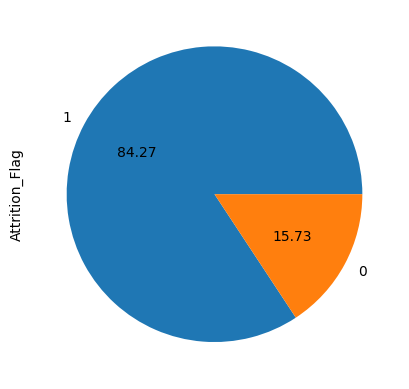

In [ ]:
y.value_counts().plot.pie(autopct="%.2f")

As can be seen above, the target variable has 84.27% male values and only 15.73% female values.

This will cause overfitting of the model. Therefore, further we will use Random Sampling.

<Axes: ylabel='Attrition_Flag'>

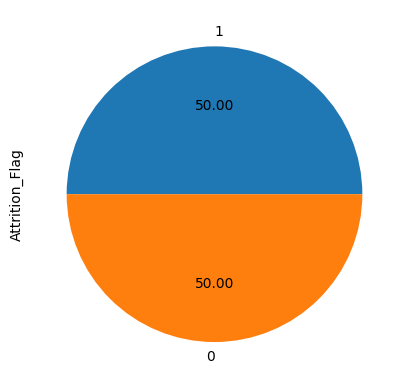

In [ ]:
ros = RandomOverSampler(sampling_strategy=1)
x_ros , y_ros = ros.fit_resample(x,y)

y_ros.value_counts().plot.pie(autopct="%.2f")

In [ ]:
y_ros.value_counts()

1    5256
0    5256
Name: Attrition_Flag, dtype: int64

**Using Random Over Sampling, instances of female records are increased so that we reach the data balance in target variable.**

**Further we will used heatmap to analyse the corrrelation between independent variables.**

<Axes: >

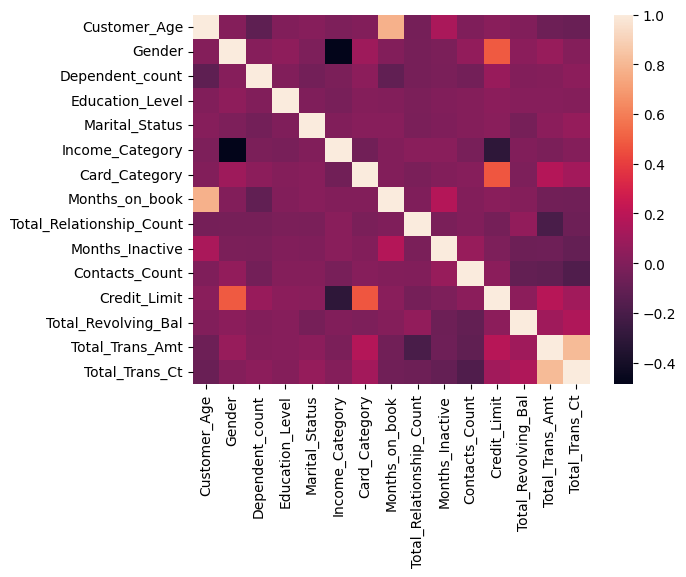

In [ ]:
sns.heatmap(x_ros.corr())

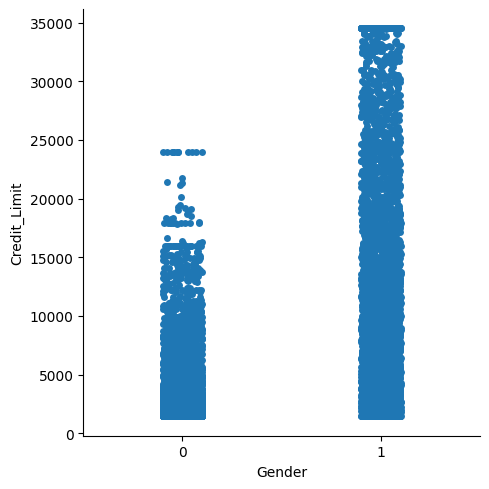

In [ ]:
sns.catplot(data=x_ros, x="Gender", y="Credit_Limit")

<Axes: xlabel='Income_Category', ylabel='Count'>

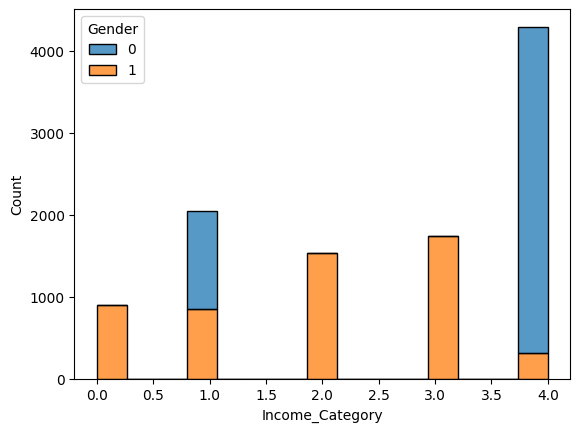

In [ ]:
sns.histplot(data=x_ros, x="Income_Category", hue="Gender", multiple="stack")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros,y_ros,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8409, 15)
(2103, 15)
(8409,)
(2103,)


Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9852591535901094

GridSearch CV

In [ ]:
# Number of trees in Random Forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,4,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [ ]:
param_grid = {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'max_samples':max_samples
              }

In [ ]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid= param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs=-1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 100}

In [ ]:
rf_grid.best_score_

0.9813292721831253

In [ ]:
rf_best_params = RandomForestClassifier(max_depth=None,
 max_features= 0.2,
 max_samples = 1.0,
 n_estimators = 120)

In [ ]:
rf_best_params.fit(X_train,y_train)
y_pred_best_params = rf_best_params.predict(X_test)
accuracy_score(y_test,y_pred_best_params)

0.9838326200665716

In [ ]:
y_train_predicted = rf_best_params.predict(X_train)

In [ ]:
accuracy_score(y_train,y_train_predicted)

1.0

Evaluation

In [ ]:
RF_confusion_matrix = confusion_matrix(y_pred,y_test)
RF_confusion_matrix

array([[1044,   31],
       [   0, 1028]])

In [ ]:
RF_confusion_matrix.diagonal().sum()*100 / RF_confusion_matrix.sum()

98.52591535901094

Support Vector Machanism

In [ ]:
svm = SVC(kernel='rbf',C=30,gamma="auto")

In [ ]:
svm.fit(X_train,y_train)
# y_svm_pred= svm.predict(X_test)
svm.score(X_test,y_test)

0.9957203994293866

In [ ]:
svm_grid = GridSearchCV(SVC(gamma='auto'),{
    'C':[10,20],
    'kernel': ['rbf','linear']
}, cv=2, return_train_score=False)

svm_grid.fit(X_train,y_train)
svm_grid.cv_results_

{'mean_fit_time': array([8.93708944e-01, 7.47421924e+02, 8.68614554e-01, 1.17729162e+03]),
 'std_fit_time': array([3.08892727e-02, 1.40833187e+02, 6.28149509e-03, 1.22988957e+02]),
 'mean_score_time': array([0.90192902, 0.16346717, 0.89297342, 0.16481459]),
 'std_score_time': array([0.00058186, 0.00355291, 0.00437284, 0.00323093]),
 'param_C': masked_array(data=[10, 10, 20, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'split0_test_score': array([0.9431629 , 0.81355529, 0.9431629 , 0.81355529]),
 'split1_test_score': array([0.93910561, 0.81803045, 0.93910561, 0.81779258]),
 'mean_test_score': array([0.94113426, 0.81579287,

In [ ]:
svm_results = pd.DataFrame(svm_grid.cv_results_)
svm_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.893709,0.030889,0.901929,0.000582,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.943163,0.939106,0.941134,0.002029,1
1,747.421924,140.833187,0.163467,0.003553,10,linear,"{'C': 10, 'kernel': 'linear'}",0.813555,0.818030,0.815793,0.002238,3
2,0.868615,0.006281,0.892973,0.004373,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.943163,0.939106,0.941134,0.002029,1
3,1177.291617,122.988957,0.164815,0.003231,20,linear,"{'C': 20, 'kernel': 'linear'}",0.813555,0.817793,0.815674,0.002119,4


In [ ]:
svm_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
svm_best_params = SVC(kernel='rbf',C=10)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9957203994293866

Checking overfitting

In [ ]:
svm.score(X_train,y_train)

1.0